## Objetivos

1. Comparativo anual entre educação e outras funções
2. Porcentagem de educação básica em relação a educação anualmente
3. Comparativo dos gastos com educação básica entre Recife e outras capitais (parcialmente feito)
4. Comparativo dos gastos com educação básica entre Recife e outros municípios de PE (a fazer)
5. Comparativo dos gastos com educação básica entre PE e outros estados (a fazer)

In [1]:
import itertools

import pandas as pd
from pandas import DataFrame as DF
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999

In [3]:
dfs = []
for ano, mes in itertools.product(range(2013,2018), range(1, 13)):
    dfs.append(pd.read_csv("./planilhas/{}{}_Transferencias.csv".format(ano, str(mes).zfill(2)), encoding = "ISO-8859-14", sep=';'))
raw = pd.concat(dfs)

/home/giulio/.virtualenvs/transparencia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/giulio/.virtualenvs/transparencia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/giulio/.virtualenvs/transparencia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/giulio/.virtualenvs/transparencia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (6,8,10,15) have mixed types. Specify dtype op

In [4]:
raw.sample(5)

,ANO / MÊS,TIPO TRANSFERÊNCIA,TIPO FAVORECIDO,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,NOME SUBFUNÇÃO,CÓDIGO PROGRAMA,NOME PROGRAMA,AÇÃO,NOME AÇÃO,LINGUAGEM CIDADÃ,CÓDIGO FAVORECIDO,NOME FAVORECIDO,VALOR TRANSFERIDO
84221,201509,"Legais, Voluntárias e Específicas",Fundo Público,PB,2059.0,JURIPIRANGA,10,SAUDE,304,VIGILANCIA SANITARIA,2015,FORTALECIMENTO DO SISTEMA UNICO DE SAUDE (SUS),20AB,"INCENTIVO FINANCEIRO AOS ESTADOS, DISTRITO FED...",Vigilância Sanitária,11164805000197,FUNDO MUNICIPAL DE SAUDE,"748,84"
65831,201607,"Legais, Voluntárias e Específicas",Entidades Sem Fins Lucrativos,PE,2381.0,CARUARU,12,EDUCACAO,847,TRANSFERENCIAS PARA A EDUCACAO BASICA,2080,EDUCACAO DE QUALIDADE PARA TODOS,0515,DINHEIRO DIRETO NA ESCOLA PARA A EDUCACAO BASICA,PDDE,02021768000177,UNIDADE EXECUTORA ALVARO LINS,"13620,00"
9333,201509,"Legais, Voluntárias e Específicas",Administração Pública Municipal,RS,1124.0,BOA VISTA DO CADEADO,12,EDUCACAO,368,EDUCACAO BASICA,2030,EDUCACAO BASICA,0969,APOIO AO TRANSPORTE ESCOLAR NA EDUCACAO BASICA,PNATE,04216132000106,MUNICIPIO DE BOA VISTA DO CADEADO,"3867,85"
83159,201705,"Legais, Voluntárias e Específicas",Administração Pública Municipal,PR,7917.0,TERRA BOA,12,EDUCACAO,368,EDUCACAO BASICA,2080,EDUCACAO DE QUALIDADE PARA TODOS,0969,APOIO AO TRANSPORTE ESCOLAR NA EDUCACAO BASICA,PNATE,75793786000140,MUNICIPIO DE TERRA BOA,"4319,05"
43916,201603,"Legais, Voluntárias e Específicas",Fundo Público,RN,1683.0,GOVERNADOR DIX-SEPT ROSADO,10,SAUDE,301,ATENCAO BASICA,2015,FORTALECIMENTO DO SISTEMA UNICO DE SAUDE (SUS),20AD,PISO DE ATENCAO BASICA VARIAVEL - SAUDE DA FAM...,PAB Variável - PSF,14684811000163,FUNDO MUNICIPAL DE SAUDE DE GOV. DIX SEPT ROSADO,"256796,00"


In [5]:
raw.columns

Index(['ANO / MÊS', 'TIPO TRANSFERÊNCIA', 'TIPO FAVORECIDO', 'UF',
       'CÓDIGO MUNICÍPIO SIAFI', 'NOME MUNICÍPIO', 'CÓDIGO FUNÇÃO',
       'NOME FUNÇÃO', 'CÓDIGO SUBFUNÇÃO', 'NOME SUBFUNÇÃO', 'CÓDIGO PROGRAMA',
       'NOME PROGRAMA', 'AÇÃO', 'NOME AÇÃO', 'LINGUAGEM CIDADÃ',
       'CÓDIGO FAVORECIDO', 'NOME FAVORECIDO', 'VALOR TRANSFERIDO'],
      dtype='object')

In [6]:
sorted(raw['NOME FUNÇÃO'].unique())

['ADMINISTRACAO',
 'AGRICULTURA',
 'ASSISTENCIA SOCIAL',
 'CIENCIA E TECNOLOGIA',
 'COMERCIO E SERVICOS',
 'COMUNICACOES',
 'CULTURA',
 'DEFESA NACIONAL',
 'DESPORTO E LAZER',
 'DIREITOS DA CIDADANIA',
 'EDUCACAO',
 'ENCARGOS ESPECIAIS',
 'ENERGIA',
 'ESSENCIAL A JUSTICA',
 'GESTAO AMBIENTAL',
 'HABITACAO',
 'INDUSTRIA',
 'JUDICIARIA',
 'Múltiplo',
 'ORGANIZACAO AGRARIA',
 'PREVIDENCIA SOCIAL',
 'RELACOES EXTERIORES',
 'SANEAMENTO',
 'SAUDE',
 'SEGURANCA PUBLICA',
 'TRABALHO',
 'TRANSPORTE',
 'URBANISMO']

In [7]:
df = raw.copy(deep=True)
df['VALOR TRANSFERIDO'] = pd.to_numeric(df['VALOR TRANSFERIDO'].str.replace(',','.'))
df['ANO / MÊS'] = df['ANO / MÊS'].astype(str).str.slice(0, 4)
df.rename(index=str, columns={'ANO / MÊS': 'ANO'}, inplace=True)

### Comparativo anual entre educação e outras funções

In [8]:
df_obj1 = df.groupby(['ANO', 'NOME FUNÇÃO'], as_index=False)['VALOR TRANSFERIDO'].sum().round(2)
maiores_valores = df_obj1.groupby('NOME FUNÇÃO', as_index=False)['VALOR TRANSFERIDO'].sum() \
                  .sort_values('VALOR TRANSFERIDO', ascending=False)[:8]['NOME FUNÇÃO']
df_outros = df_obj1[df_obj1['NOME FUNÇÃO'].map(lambda x: x not in list(maiores_valores))] \
            .groupby('ANO', as_index=False)['VALOR TRANSFERIDO'].sum()
df_outros['NOME FUNÇÃO'] = 'OUTROS'
df_maiores_valores = df_obj1[df_obj1['NOME FUNÇÃO'].map(lambda x: x in list(maiores_valores))]
df_obj1 = pd.concat([df_maiores_valores, df_outros])
df_obj1.head(15)


/home/giulio/.virtualenvs/transparencia/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,ANO,NOME FUNÇÃO,VALOR TRANSFERIDO
0,2013,EDUCACAO,9.271719e+09
1,2013,ENCARGOS ESPECIAIS,1.715172e+11
4,2014,ASSISTENCIA SOCIAL,4.376632e+09
5,2014,CIENCIA E TECNOLOGIA,1.320338e+09
12,2014,EDUCACAO,2.477727e+10
13,2014,ENCARGOS ESPECIAIS,1.894278e+11
16,2014,GESTAO AMBIENTAL,1.657311e+09
24,2014,SANEAMENTO,1.637035e+09
25,2014,SAUDE,6.455463e+10
29,2014,URBANISMO,1.460456e+09


Text(0, 0.5, 'VALOR TRANSFERIDO (R$)')

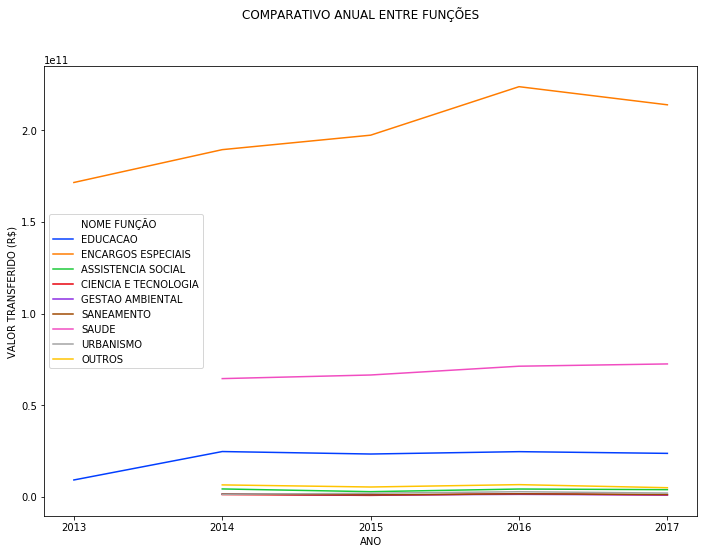

In [9]:
fig1, ax1 = plt.subplots(figsize=(11.7, 8.27))
plot1 = sns.lineplot(data=df_obj1,
                     x='ANO',
                     hue='NOME FUNÇÃO',
                     y='VALOR TRANSFERIDO',
                     palette='bright',
                     ax=ax1)
fig1.suptitle('COMPARATIVO ANUAL ENTRE FUNÇÕES')
ax1.set_ylabel('VALOR TRANSFERIDO (R$)')

### Porcentagem de educação básica em relação a educação anualmente

In [10]:
cond_ed_bas = ((df['NOME FUNÇÃO'] == 'EDUCACAO')
               & (df['NOME SUBFUNÇÃO'].str.contains('EDUCACAO BASICA')
                  | df['NOME PROGRAMA'].str.contains('EDUCACAO BASICA')
                  | df['NOME AÇÃO'].str.contains('EDUCACAO BASICA')))
df_ed_bas = df[cond_ed_bas].groupby('ANO', as_index=False)['VALOR TRANSFERIDO'].sum()
df_ed_bas['TIPO'] = 'EDUCACAO BASICA'
df_ed_bas

,ANO,VALOR TRANSFERIDO,TIPO
0,2013,9.271719e+09,EDUCACAO BASICA
1,2014,2.147464e+10,EDUCACAO BASICA
2,2015,2.158602e+10,EDUCACAO BASICA
3,2016,2.230297e+10,EDUCACAO BASICA
4,2017,2.253823e+10,EDUCACAO BASICA


In [11]:
cond_ed = df['NOME FUNÇÃO'] == 'EDUCACAO'
df_ed = df[cond_ed].groupby('ANO', as_index=False)['VALOR TRANSFERIDO'].sum()
df_ed['TIPO'] = 'EDUCACAO'
df_ed

,ANO,VALOR TRANSFERIDO,TIPO
0,2013,9.271719e+09,EDUCACAO
1,2014,2.477727e+10,EDUCACAO
2,2015,2.342473e+10,EDUCACAO
3,2016,2.471363e+10,EDUCACAO
4,2017,2.377954e+10,EDUCACAO


In [12]:
df_obj2 = DF()
df_obj2['ANO'] = df_ed['ANO']
df_obj2['PERCENTUAL'] = df_ed_bas['VALOR TRANSFERIDO'].divide(df_ed['VALOR TRANSFERIDO']) * 100
df_obj2

,ANO,PERCENTUAL
0,2013,100.000000
1,2014,86.670746
2,2015,92.150560
3,2016,90.245630
4,2017,94.779917


Text(0.5, 0.98, 'PERCENTUAL DE VALOR TRANSFERIDO PARA EDUCAÇÃO DESTINADO À EDUCAÇÃO BÁSICA')

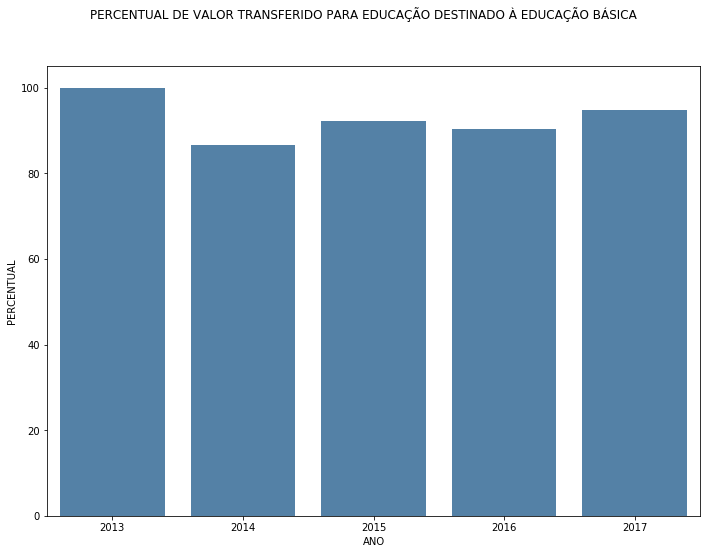

In [13]:
fig2, ax2 = plt.subplots(figsize=(11.7, 8.27))
plot2 = sns.barplot(data=df_obj2,
                     x='ANO',
                     y='PERCENTUAL',
                     color='steelblue',
                     ax=ax2)
fig2.suptitle('PERCENTUAL DE VALOR TRANSFERIDO PARA EDUCAÇÃO DESTINADO À EDUCAÇÃO BÁSICA')

### Comparativo dos gastos com educação básica entre Recife e outras capitais

In [14]:
capitais = {}
for nome_cap in ['ARACAJU','BELEM','BELO HORIZONTE','BOA VISTA','BRASILIA','CAMPO GRANDE','CUIABA','CURITIBA','FLORIANOPOLIS','FORTALEZA','GOIANIA','JOAO PESSOA','MACAPA','MACEIO','MANAUS','NATAL','PALMAS','PORTO ALEGRE','PORTO VELHO','RECIFE','RIO BRANCO','RIO DE JANEIRO','SALVADOR','SAO LUIS','SAO PAULO','TERESINA','VITORIA',]:
    capitais[nome_cap] = int(df[df['NOME MUNICÍPIO'] == nome_cap]['CÓDIGO MUNICÍPIO SIAFI'].mode())
capitais

{'ARACAJU': 3105,
 'BELEM': 427,
 'BELO HORIZONTE': 4123,
 'BOA VISTA': 301,
 'BRASILIA': 9701,
 'CAMPO GRANDE': 9051,
 'CUIABA': 9067,
 'CURITIBA': 7535,
 'FLORIANOPOLIS': 8105,
 'FORTALEZA': 1389,
 'GOIANIA': 9373,
 'JOAO PESSOA': 2051,
 'MACAPA': 605,
 'MACEIO': 2785,
 'MANAUS': 255,
 'NATAL': 1761,
 'PALMAS': 9733,
 'PORTO ALEGRE': 8801,
 'PORTO VELHO': 3,
 'RECIFE': 2531,
 'RIO BRANCO': 139,
 'RIO DE JANEIRO': 6001,
 'SALVADOR': 3849,
 'SAO LUIS': 921,
 'SAO PAULO': 7107,
 'TERESINA': 1219,
 'VITORIA': 5705}

In [15]:
cond_cap = ((df['CÓDIGO MUNICÍPIO SIAFI'].map(lambda x: x in capitais.values()))
            & (df['NOME SUBFUNÇÃO'].str.contains('EDUCACAO BASICA')
               | df['NOME PROGRAMA'].str.contains('EDUCACAO BASICA')
               | df['NOME AÇÃO'].str.contains('EDUCACAO BASICA')))
df_cap = df[cond_cap].groupby(['ANO', 'NOME MUNICÍPIO'], as_index=False)['VALOR TRANSFERIDO'].sum()
df_cap

,ANO,NOME MUNICÍPIO,VALOR TRANSFERIDO
0,2013,ARACAJU,4.647578e+07
1,2013,BELEM,1.018831e+08
2,2013,BELO HORIZONTE,1.206833e+08
3,2013,BOA VISTA,7.682559e+07
4,2013,CAMPO GRANDE,7.334462e+07
5,2013,CUIABA,3.905857e+07
6,2013,CURITIBA,9.069551e+07
7,2013,FLORIANOPOLIS,1.816569e+07
8,2013,FORTALEZA,2.711896e+08
9,2013,GOIANIA,8.031446e+07


In [16]:
df_obj3= df_cap[df_cap['NOME MUNICÍPIO'].map(lambda x: x in ['ARACAJU','FORTALEZA','JOAO PESSOA','MACEIO','NATAL','RECIFE','SALVADOR','SAO LUIS','TERESINA',])]
df_obj3.sample(10)

,ANO,NOME MUNICÍPIO,VALOR TRANSFERIDO
79,2016,ARACAJU,8.757546e+07
44,2014,RECIFE,1.193731e+08
121,2017,NATAL,1.690617e+08
14,2013,NATAL,7.072749e+07
26,2014,ARACAJU,5.089542e+07
67,2015,NATAL,1.304583e+08
50,2014,TERESINA,1.677756e+08
94,2016,NATAL,1.221440e+08
115,2017,FORTALEZA,6.122326e+08
88,2016,FORTALEZA,6.231410e+08


Text(0, 0.5, 'VALOR TRANSFERIDO (R$)')

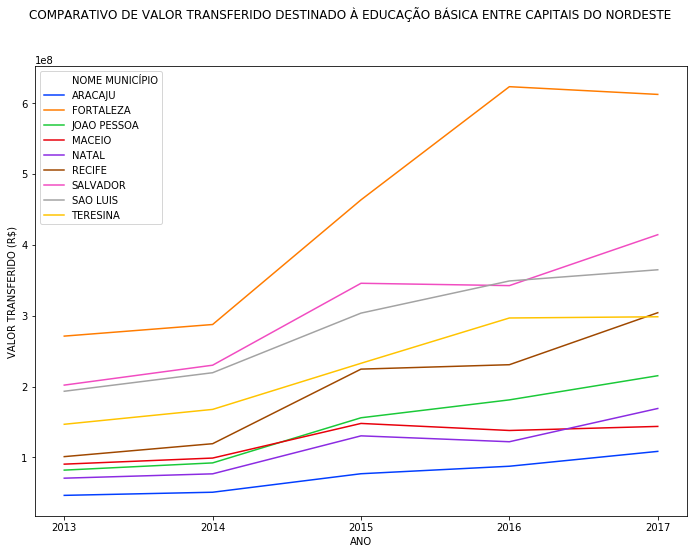

In [17]:
fig3, ax3 = plt.subplots(figsize=(11.7, 8.27))
plot3 = sns.lineplot(data=df_obj3,
                     x='ANO',
                     hue='NOME MUNICÍPIO',
                     y='VALOR TRANSFERIDO',
                     palette='bright',
                     ax=ax3)
fig3.suptitle('COMPARATIVO DE VALOR TRANSFERIDO DESTINADO À EDUCAÇÃO BÁSICA ENTRE CAPITAIS DO NORDESTE')
ax3.set_ylabel('VALOR TRANSFERIDO (R$)')